In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
col_name = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bni', 'pedigree', 'age', 'label']
df = pd.read_csv('diabetes.csv', names=col_name, skiprows=1)
df.head()

,pregnant,glucose,bp,skin,insulin,bni,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bni       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# df.drop_duplicates()

In [8]:
X = df.drop('label', axis=1)
y = df['label']

In [9]:
y.value_counts()

label
0    500
1    268
Name: count, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear')
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [12]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[92, 11],
       [26, 25]], dtype=int64)

In [15]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       103
           1       0.69      0.49      0.57        51

    accuracy                           0.76       154
   macro avg       0.74      0.69      0.70       154
weighted avg       0.75      0.76      0.75       154



### Способы борьбы с дисбалансом классов

1. oversampling
2. undersampling

In [18]:
class0_index = y[y == 0].index
class1_index = y[y == 1].index

In [22]:
class0_index_undersampled = np.random.choice(class0_index, class1_index.size, replace=False)

In [23]:
class0_index_undersampled.size

268

In [25]:
y_new = pd.concat([y.iloc[class0_index_undersampled], y.iloc[class1_index]], axis=0)
y_new.shape

(536,)

In [26]:
y_new.value_counts()

label
0    268
1    268
Name: count, dtype: int64

In [27]:
X_new = pd.concat([X.iloc[class0_index_undersampled], X.iloc[class1_index]], axis=0)
X_new.shape

(536, 8)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=25)

In [29]:
clf = LogisticRegression(solver='liblinear')
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [30]:
metrics.confusion_matrix(y_test, y_pred)

array([[34, 14],
       [22, 38]], dtype=int64)

In [31]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.71      0.65        48
           1       0.73      0.63      0.68        60

    accuracy                           0.67       108
   macro avg       0.67      0.67      0.67       108
weighted avg       0.68      0.67      0.67       108



Теперь oversampling

In [33]:
class1_index_oversampled = np.random.choice(class1_index, class0_index.size, replace=True)

In [34]:
class1_index_oversampled.shape

(500,)

In [35]:
y_new = pd.concat([y.iloc[class0_index], y.iloc[class1_index_oversampled]], axis=0)
y_new.shape

(1000,)

In [36]:
y_new.value_counts()

label
0    500
1    500
Name: count, dtype: int64

In [37]:
X_new = pd.concat([X.iloc[class0_index], X.iloc[class1_index_oversampled]], axis=0)
X_new.shape

(1000, 8)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=25)

In [39]:
clf = LogisticRegression(solver='liblinear')
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [40]:
metrics.confusion_matrix(y_test, y_pred)

array([[80, 22],
       [28, 70]], dtype=int64)

In [41]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       102
           1       0.76      0.71      0.74        98

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200



3 способ используем встроенное значение `class_weight`

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

clf = LogisticRegression(solver='liblinear', class_weight='balanced')
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [43]:
metrics.confusion_matrix(y_test, y_pred)

array([[81, 22],
       [16, 35]], dtype=int64)

In [44]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       103
           1       0.61      0.69      0.65        51

    accuracy                           0.75       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.76      0.75      0.76       154



Самостоятельная часть

In [46]:
import seaborn as sns

In [76]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [77]:
X = df.drop('output', axis=1)
y = df['output']

In [78]:
y.value_counts()

output
1    165
0    138
Name: count, dtype: int64

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [80]:
clf = LogisticRegression(solver='liblinear')
y_pred = clf.fit(X_train, y_train).predict(X_test)

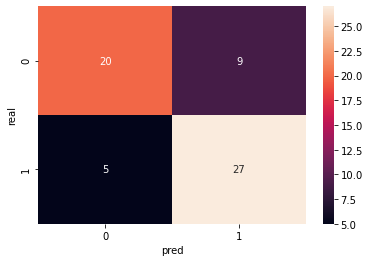

In [81]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('pred')
plt.ylabel('real');

In [82]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74        29
           1       0.75      0.84      0.79        32

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [83]:
class0_index = y[y == 0].index
class1_index = y[y == 1].index

In [84]:
class1_index_undersampled = np.random.choice(class1_index, class0_index.size, replace=False)

In [85]:
class1_index_undersampled.size

138

In [88]:
y_new = pd.concat([y.iloc[class1_index_undersampled], y.iloc[class0_index]], axis=0)
y_new.shape

(276,)

In [89]:
y_new.value_counts()

output
1    138
0    138
Name: count, dtype: int64

In [90]:
X_new = pd.concat([X.iloc[class1_index_undersampled], X.iloc[class0_index]], axis=0)
X_new.shape

(276, 13)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=25)

In [92]:
clf = LogisticRegression(solver='liblinear')
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [93]:
metrics.confusion_matrix(y_test, y_pred)

array([[21,  6],
       [ 3, 26]], dtype=int64)

In [94]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.81      0.90      0.85        29

    accuracy                           0.84        56
   macro avg       0.84      0.84      0.84        56
weighted avg       0.84      0.84      0.84        56



### 1) Загрузите и прочитайте в pandas приложенный датасет. Посмотрите размер датасета, типы переменных, пустые значения.

In [103]:
df = pd.read_csv('moscow_full_2.0.csv')
df.head()

,title,description,adress,metro,cost,cost_for_meter
0,"Квартира своб. планировки, 130 м², 5/5 эт.",Представляю Вашему вниманию 2-х уровневый пент...,"Москва, 3-я улица Ямского Поля, 9к3",Белорусская 407 м,38 000 000 ₽,292 308 ₽ за м²
1,"2-комн. квартира, 93 м², 6/10 эт.",В премиальном ЖК Hyatt Regency предлагаем Ваше...,"Москва, Ленинградский проспект, 36с31",Динамо 612 м,47 000 000 ₽,505 376 ₽ за м²
2,"1-комн. квартира, 36 м², 5/16 эт.","Свободная продажа, никто не прописан. В кварти...","Москва, Печорская улица, 5",Бабушкинская 792 м,8 800 000 ₽,244 444 ₽ за м²
3,"1-комн. квартира, 47.59 м²",Многофункциональный комплекс «Нахимов» предста...,пр-т Нахимовский,Профсоюзная 1.4 км,8 810 837 ₽,185 141 ₽ за м²
4,"1-комн. квартира, 36 м², 6/12 эт.",Собственник. Риелторов и прочих помогателей ПР...,"Москва, Новорогожская улица, 11к2",Римская 446 м,11 700 000 ₽,325 000 ₽ за м²


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55848 entries, 0 to 55847
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           55848 non-null  object
 1   description     55848 non-null  object
 2   adress          55532 non-null  object
 3   metro           55848 non-null  object
 4   cost            55848 non-null  object
 5   cost_for_meter  55848 non-null  object
dtypes: object(6)
memory usage: 2.6+ MB


### 2) Разбейте столбец title на 4 столбца: количество комнат (n_rooms), площадь квартиры (area), этаж (floor), этажность дома (n_house_floors). А сам столбец title удалите. Типы данных в столбцах сделайте int или float.

In [106]:
import re

In [123]:
re.findall(r'\d+', ' 32/ 4 hj')

['32', '4']

In [126]:
buf1 = buf

0        [Квартира своб. планировки,  130 м²,  5/5 эт.]
1                 [2-комн. квартира,  93 м²,  6/10 эт.]
2                 [1-комн. квартира,  36 м²,  5/16 эт.]
3                         [1-комн. квартира,  47.59 м²]
4                 [1-комн. квартира,  36 м²,  6/12 эт.]
                              ...                      
55843           [3-комн. квартира,  58.4 м²,  3/12 эт.]
55844           [3-комн. квартира,  74.8 м²,  5/17 эт.]
55845           [2-комн. квартира,  53.9 м²,  6/17 эт.]
55846            [1-комн. квартира,  30.7 м²,  3/5 эт.]
55847           [1-комн. квартира,  35.3 м²,  3/16 эт.]
Name: title, Length: 55848, dtype: object

In [125]:
buf = df['title'].str.split(',')
buf.map(lambda x: [re.findall(r'\d+', x[1])[0], re.findall(r'\d+', x[2])[0], re.findall(r'\d+', x[2])[1]] 
        if len(re.findall(r'\d+', x[2])) == 2 else [re.findall(r'\d+', x[1])[0], re.findall(r'\d+', x[2])[0]])

IndexError: list index out of range

In [121]:
buf[0][2].split('/')[0].strip()

'5'